In [1]:
import pandas as pd
import numpy as np
import healpy as hp
import os.path as osp
import os
from matplotlib import pyplot as plt
import time

# 读取星表

## 表名列名

In [2]:
def dc2dn(dc):
    '''database column TO dataframe names'''
    return dc.replace(' ','').split('|')[1:-1]

In [3]:
names_gsc22 = dc2dn('| gscID2 | RAmas      | DECmas | EP00000c | RGSC2mm | BGSC2mm | VGSC2mm | IGSC2mm | CLASSIFICATION | EXTcs | Eccen | PosAng | htmID_8 | htmID_6 | healpID_nest_8 |')
names_gsc23 = dc2dn('| ghtmID | gscID2 | RAmas   | DECmas | EP00000c | RAPMdmas | DECPMdmas | eRAPMdmas | eDECPMdmas | RGSC2mm | BGSC2mm | VGSC2mm | IGSC2mm | CLASSIFICATION | sourceStat | MASTERhpx6 | runningnumber | htmID_6 | healpID_nest_8 |')
names_gsc24 = dc2dn('| RAmas     | DECmas  | eRAmas | eDECmas | RAPMdmas | DECPMdmas | eRAPMdmas | eDECPMdmas | Mmm   | FLAGSgsc24 | EP00000c | Nobs | MeanEP00000c | MinEP00000c | epdiff000 | iplate | nplate | MASTERhpx6 | runningnumber | htmID_6 | healpID_nest_8 |')
names_ucac  = dc2dn('| RAmas   | DECmas     | Amm   | CLASSIFICATION | eRAmas | eDECmas | NCAT | EpRA00000c | EpDEC00000c | RAPMdmas | DECPMdmas | eRAPMdmas | eDECPMdmas | ID      | EP00000c | DISTGSCcas | MASTERhpx6 | runningnumber | htmID_6 | healpID_nest_8 |')
names_ucac2 = dc2dn('| htmID_6 | RAmas   | DECmas     | eRAmas | eDECmas | RAPMdm | DECPMdm | eRAPMdm | eDECPMdm | Amm   | EP00000c | EP00000cd | stat1 | stat2 | ID    |')
names_ucac3 = dc2dn('| RAmas   | DECmas     | eRAmas | eDECmas | RAPMdmas | DECPMdmas | eRAPMdmas | eDECPMdmas | Amm   | EP00000c | EpRA00000c | EpDEC00000c | stat1 | stat2 | ID   | DISTGSCcas | MASTERhpx6 | runningnumber | htmID_6 | healpID_nest_8 |')
names_ucac4 = dc2dn('| RAmas | DECmas   | Amm   | CLASSIFICATION | eRAmas | eDECmas | NCAT | EpRA00000c | EpDEC00000c | RAPMdmas | DECPMdmas | eRAPMdmas | eDECPMdmas | ID        | EP00000c | DISTGSCcas | MASTERhpx6 | runningnumber | htmID_6 | healpID_nest_8 |')
names_ucac5 = 'RAJ2000;DEJ2000;SrcIDgaia;RAgaia;e_RAgaia;DEgaia;e_DEgaia;Org;Nu;EPucac;pmRA;e_pmRA;pmDE;e_pmDE;Gmag;f.mag;Rmag;Jmag;Hmag;Kmag\n'.replace('\n','').split(';')

In [11]:
# 给数据库直接导出的表添加表头
add_names = False
if add_names:
    HOME = '/data/Catalogdata/'
    db_list = ['gsc22','gsc23','gsc24','ucac','ucac2','ucac3','ucac4','ucac5']
    names_list = [names_gsc22, names_gsc23, names_gsc24, names_ucac, names_ucac2, names_ucac3, names_ucac4, names_ucac5]
    for _i, _db in enumerate(db_list[:-1]):
        db_file = HOME+_db+'.csv'
        with open(db_file, 'r') as dbf:
            _c = dbf.readlines()
        with open(db_file, 'w') as dbf:
            names = '\t'.join(names_list[_i])+'\n'
            _c.insert(0, names)
            print(names)
            dbf.writelines(_c)

gscID2	RAmas	DECmas	EP00000c	RGSC2mm	BGSC2mm	VGSC2mm	IGSC2mm	CLASSIFICATION	EXTcs	Eccen	PosAng	htmID_8	htmID_6	healpID_nest_8

ghtmID	gscID2	RAmas	DECmas	EP00000c	RAPMdmas	DECPMdmas	eRAPMdmas	eDECPMdmas	RGSC2mm	BGSC2mm	VGSC2mm	IGSC2mm	CLASSIFICATION	sourceStat	MASTERhpx6	runningnumber	htmID_6	healpID_nest_8

RAmas	DECmas	eRAmas	eDECmas	RAPMdmas	DECPMdmas	eRAPMdmas	eDECPMdmas	Mmm	FLAGSgsc24	EP00000c	Nobs	MeanEP00000c	MinEP00000c	epdiff000	iplate	nplate	MASTERhpx6	runningnumber	htmID_6	healpID_nest_8

RAmas	DECmas	Amm	CLASSIFICATION	eRAmas	eDECmas	NCAT	EpRA00000c	EpDEC00000c	RAPMdmas	DECPMdmas	eRAPMdmas	eDECPMdmas	ID	EP00000c	DISTGSCcas	MASTERhpx6	runningnumber	htmID_6	healpID_nest_8

htmID_6	RAmas	DECmas	eRAmas	eDECmas	RAPMdm	DECPMdm	eRAPMdm	eDECPMdm	Amm	EP00000c	EP00000cd	stat1	stat2	ID

RAmas	DECmas	eRAmas	eDECmas	RAPMdmas	DECPMdmas	eRAPMdmas	eDECPMdmas	Amm	EP00000c	EpRA00000c	EpDEC00000c	stat1	stat2	ID	DISTGSCcas	MASTERhpx6	runningnumber	htmID_6	healpID_nest_8

RAmas	DECmas	Amm	CLASS

In [31]:
# 去掉首行（头恢复）
delete_1 = False
if delete_1:
    for _db in db_list:
        db_file = HOME+_db+'.csv'
        with open(db_file,'r') as dbf:
            _c = dbf.readlines()
        _c[0] = _c[0].split
        with open(db_file,'w') as dbf:
            dbf.writelines(_c)

FileNotFoundError: [Errno 2] No such file or directory: '/data/Catalogdata/ucac5.csv'

In [3]:
xx = np.load('./column_names_ucac5.npy',allow_pickle=True)
xx

array(['RAJ2000', 'DEJ2000', 'SrcIDgaia', 'RAgaia', 'e_RAgaia', 'DEgaia',
       'e_DEgaia', 'Org', 'Nu', 'EPucac', 'pmRA', 'e_pmRA', 'pmDE',
       'e_pmDE', 'Gmag', 'f.mag', 'Rmag', 'Jmag', 'Hmag', 'Kmag', 'hpix8'],
      dtype=object)

In [8]:
xx[15] = xx[15].replace('.','')
np.save('./column_names_ucac5.npy',xx)
xx

array(['RAJ2000', 'DEJ2000', 'SrcIDgaia', 'RAgaia', 'e_RAgaia', 'DEgaia',
       'e_DEgaia', 'Org', 'Nu', 'EPucac', 'pmRA', 'e_pmRA', 'pmDE',
       'e_pmDE', 'Gmag', 'fmag', 'Rmag', 'Jmag', 'Hmag', 'Kmag', 'hpix8'],
      dtype=object)

test

In [9]:
'\t'.join(names_gsc22)

'gscID2\tRAmas\tDECmas\tEP00000c\tRGSC2mm\tBGSC2mm\tVGSC2mm\tIGSC2mm\tCLASSIFICATION\tEXTcs\tEccen\tPosAng\thtmID_8\thtmID_6\thealpID_nest_8'

In [19]:
with open('./tt.txt', 'w') as f:
    f.writelines(['a\tb\tc\n','0\t1\t2\n'])

pd.read_csv('./tt.txt',sep='\t')

,a,b,c
0,0,1,2


In [21]:
with open('./tt.txt', 'r') as f:
    ss = f.readlines()
    
ss

['a\tb\tc\n', '0\t1\t2\n']

In [24]:
ss.insert(0,'\t'.join(names_list[0])+'/n')
ss

['gscID2\tRAmas\tDECmas\tEP00000c\tRGSC2mm\tBGSC2mm\tVGSC2mm\tIGSC2mm\tCLASSIFICATION\tEXTcs\tEccen\tPosAng\thtmID_8\thtmID_6\thealpID_nest_8/n',
 'a\tb\tc\n',
 '0\t1\t2\n']

## 读表

### UCAC5重写

In [ ]:
with open('/data/Catalogdata/UCAC_5.tsv') as f:
    s = f.readlines()
s = [s[106]] + s[109:107758622]
s

In [ ]:
snew = []
for _i, _l in enumerate(s):
    snew.append(_l.replace(' ','').replace(';',','))
snew

In [22]:
with open('./ucac5t.csv','w') as fnew:
    fnew.writelines(snew[:100])
    fnew.write('-'*100)
    fnew.writelines(snew[1::100000])
    fnew.write('-'*100)
    fnew.writelines(snew[-100:])

In [23]:
with open('./ucac5.csv','w') as fnew:
    fnew.writelines(snew)

In [24]:
# test
tt = pd.read_csv('./ucac5.csv')
tt

,RAJ2000,DEJ2000,SrcIDgaia,RAgaia,e_RAgaia,DEgaia,e_DEgaia,Org,Nu,EPucac,pmRA,e_pmRA,pmDE,e_pmDE,Gmag,f.mag,Rmag,Jmag,Hmag,Kmag
0,65.456571,40.418535,227681507761376768,65.456561,0.2,40.418519,0.1,2,9,2002.266,-2.1,1.3,-4.5,1.3,13.790,14.252,13.67,12.331,12.043,11.913
1,65.461113,40.435120,227681610840995840,65.461147,0.4,40.434918,0.2,2,1,2002.123,7.4,9.6,-56.4,9.6,16.361,16.349,16.52,14.163,13.396,13.182
2,65.419492,40.440007,227681748279543936,65.419569,0.2,40.439991,0.1,2,10,2002.247,16.5,1.1,-4.5,1.1,12.536,12.876,12.55,11.102,10.816,10.695
3,65.428427,40.439695,227681782639282560,65.428431,0.5,40.439677,0.3,1,10,2002.230,0.8,1.0,-5.1,1.0,11.200,11.354,10.90,10.268,10.179,10.129
4,65.445178,40.436758,227681821293726080,65.445229,3.3,40.436834,1.1,2,4,2002.285,10.9,3.9,21.3,3.5,16.027,16.199,15.56,13.563,13.198,13.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107758508,65.488001,40.421669,227681164163992704,65.488013,0.3,40.421671,0.1,2,3,2002.326,2.6,3.4,0.5,3.4,15.298,15.765,14.94,13.885,13.678,13.543
107758509,65.529890,40.458933,227681335963125376,65.529976,0.3,40.458874,0.2,2,3,2002.128,18.2,5.0,-16.4,4.9,15.562,16.240,15.46,13.580,12.852,12.710
107758510,65.527640,40.464080,227681335963132544,65.527760,1.0,40.463995,0.4,2,0,2002.123,25.5,38.8,-23.7,38.8,16.239,16.344,16.38,14.320,13.849,13.694
107758511,65.445104,40.407690,227681404682162048,65.445113,0.3,40.407680,0.1,2,5,2002.255,2.0,1.7,-2.9,1.8,14.193,14.775,14.50,11.770,11.067,10.854


In [ ]:
display(tt)

### 其他表

In [17]:
HOME = '/data/Catalogdata/'
db_list = ['gsc22','gsc23','gsc24','ucac','ucac2','ucac3','ucac4','ucac5']
names_list = [names_gsc22, names_gsc23, names_gsc24, names_ucac, names_ucac2, names_ucac3, names_ucac4, names_ucac5]
path_list = [HOME+_db+'.csv' for _db in db_list]

In [18]:
for i,_db in enumerate(db_list):
    _sep = ('\t' if _db!= 'ucac5' else ',')
    _cat = pd.read_csv(path_list[i],sep=_sep)
    print(_db)
    display(_cat[:10])
    

gsc22


,gscID2,RAmas,DECmas,EP00000c,RGSC2mm,BGSC2mm,VGSC2mm,IGSC2mm,CLASSIFICATION,EXTcs,Eccen,PosAng,htmID_8,htmID_6,healpID_nest_8
0,180,1295936850,158540,9182000,13658,14964,-32768,0,1,480,7,32,786432,49152,311296
1,541,1295959220,186150,9182000,18326,18975,-32768,0,1,229,3,88,786432,49152,311296
2,532,1295892050,182430,9182000,18057,19379,-32768,0,1,234,6,74,786432,49152,311296
3,263,1295962370,44530,9182000,14974,16305,-32768,0,1,398,11,47,786432,49152,311296
4,625,1295966610,216090,9182000,18191,-32768,-32768,0,1,231,14,20,786432,49152,311296
5,376,1295961100,100320,9182000,17209,18289,-32768,0,1,287,14,175,786432,49152,311296
6,1125,1295929190,451430,9182000,17959,-32768,-32768,0,1,268,12,23,786432,49152,311296
7,1255,1295948650,523700,9182000,18472,-32768,-32768,0,1,230,2,178,786432,49152,311296
8,170,1295644010,272210,9182000,13761,14716,-32768,0,1,466,6,39,786432,49152,300373
9,196,1295595500,8170,9182000,18390,19073,-32768,0,1,261,14,44,786432,49152,300373


gsc23


,ghtmID,gscID2,RAmas,DECmas,EP00000c,RAPMdmas,DECPMdmas,eRAPMdmas,eDECPMdmas,RGSC2mm,BGSC2mm,VGSC2mm,IGSC2mm,CLASSIFICATION,sourceStat,MASTERhpx6,runningnumber,htmID_6,healpID_nest_8
0,32768,1,4412284,-5256,10000000,-129,-116,2,2,-32768,-32768,11471,0,0,99999900,18090,1,32768,289445
1,32768,2,170474,-23992,9182000,30,-185,3,3,14214,15303,-32768,13876,0,101011208,18090,2,32768,289450
2,32768,3,3823230,-26635,10000000,141,87,1,1,-32768,-32768,9634,0,0,99999900,18090,3,32768,289444
3,32768,4,4864572,-62551,9182000,59,-218,2,4,13075,14127,-32768,12644,0,101011208,18090,4,32768,289445
4,32768,5,1572995,-67919,9184000,0,0,0,0,-32768,-32768,11349,0,0,99999900,18090,5,32768,289449
5,32768,6,3170616,-108594,9182000,116,-155,4,4,14346,15342,-32768,13845,0,1101011208,18090,6,32768,289446
6,32768,7,4805193,-115992,9182000,-91,-162,2,4,12214,13223,-32768,11899,0,101011208,18090,7,32768,289445
7,32768,8,1830459,-125261,9182000,5,-194,6,4,16007,13295,-32768,11924,0,1101011508,18090,8,32768,289449
8,32768,9,1849847,-130950,9182000,41,-163,5,5,12006,13885,-32768,11691,0,1101011508,18090,9,32768,289449
9,32768,10,117142,-145856,9182000,-20,-44,6,4,12187,12375,-32768,13666,0,1101011208,17407,1,32768,278527


gsc24


,RAmas,DECmas,eRAmas,eDECmas,RAPMdmas,DECPMdmas,eRAPMdmas,eDECPMdmas,Mmm,FLAGSgsc24,...,Nobs,MeanEP00000c,MinEP00000c,epdiff000,iplate,nplate,MASTERhpx6,runningnumber,htmID_6,healpID_nest_8
0,164116522,2540779,29,28,-150,-101,13,12,14140,0,...,9,8293952,5580896,42081,3553,2,0,1,61952,16
1,164170250,2439356,33,31,54,33,15,14,15390,0,...,9,8293952,5580896,42081,3553,2,0,2,61952,5
2,163735515,2422180,27,25,54,-154,12,11,14410,0,...,9,8293952,5580896,42081,3553,2,0,3,61952,5
3,164213459,2397365,36,35,33,-31,19,19,13350,0,...,8,8633081,5580896,42081,3553,2,0,4,61952,5
4,163680430,2358667,60,118,1014,-180,26,52,10900,0,...,9,8293952,5580896,42081,3553,2,0,5,61952,5
5,163702955,2238402,30,46,7,89,13,20,14440,0,...,9,8293952,5580896,42081,3553,2,0,6,61952,5
6,163645324,2209438,39,29,-18,-36,17,12,15190,0,...,9,8293952,5580896,42081,3553,2,0,7,61952,5
7,163863933,2108937,28,20,169,-104,12,9,15280,0,...,9,8293952,5580896,42081,3553,2,0,8,61952,5
8,163666940,2078605,45,36,142,-148,20,16,13530,0,...,9,8293952,5580896,42081,3553,2,0,9,61952,5
9,163930651,1961744,41,27,34,48,18,12,13400,0,...,9,8293952,5580896,42081,3553,2,0,10,61952,5


ucac


,RAmas,DECmas,Amm,CLASSIFICATION,eRAmas,eDECmas,NCAT,EpRA00000c,EpDEC00000c,RAPMdmas,DECPMdmas,eRAPMdmas,eDECPMdmas,ID,EP00000c,DISTGSCcas,MASTERhpx6,runningnumber,htmID_6,healpID_nest_8
0,4117825,-323707030,13950,0,18,30,2,8388607,8388607,119,-130,31,33,1000076,10000000,60,32768,96,33792,524288
1,11728591,-323559098,14858,0,30,32,2,8388607,8388607,42,-24,39,39,1000185,10000000,43,32768,1315,33792,524288
2,18290451,-323317955,10400,0,13,12,5,8388607,8388607,26,36,13,11,1000431,10000000,1,32768,93,33792,524288
3,28174150,-323686531,14012,0,23,20,2,8388607,8388607,153,-6,32,31,1000084,10000000,36,32768,95,33792,524288
4,31121537,-323898932,16079,5,95,98,1,8388607,8388607,0,0,500,500,1000007,10000000,54,32768,547,33792,524288
5,35432525,-323636413,13032,0,20,17,2,8388607,8388607,126,0,29,29,1000121,10000000,66,32768,94,33792,524288
6,37910656,-323498585,15692,0,67,72,2,8388607,8388607,-22,2,69,70,1000243,10000000,48,32768,1446,33792,524288
7,38045128,-323891809,13627,0,27,21,2,8388607,8388607,39,156,32,31,1000010,10000000,70,32768,98,33792,524288
8,38056505,-323353960,16013,0,52,54,2,8388607,8388607,166,10,51,51,1000393,10000000,54,32768,1803,33792,524288
9,38701770,-323615098,16242,0,87,83,2,8388607,8388607,72,28,83,82,1000136,10000000,65,32768,1168,33792,524288


ucac2


,htmID_6,RAmas,DECmas,eRAmas,eDECmas,RAPMdm,DECPMdm,eRAPMdm,eDECPMdm,Amm,EP00000c,EP00000cd,stat1,stat2,ID
0,33792,1246420,-322767600,76,88,180,-30,8,8,15910,9233,9021,1,1,11475
1,33792,4125220,-323707010,16,28,190,-180,6,6,13820,9825,9766,1,1,153
2,33792,7345110,-322447510,24,26,340,100,6,6,15790,9790,9780,1,1,12541
3,33792,8139380,-322284300,54,26,150,-10,6,6,14790,9545,9791,1,1,13076
4,33792,11128880,-323115460,16,44,160,-70,6,6,16310,9836,9656,1,1,10097
5,33792,11437030,-323154960,58,32,20,-50,6,6,15580,9486,9739,1,1,9948
6,33792,11728910,-323559080,32,34,30,-20,6,6,14740,9744,9724,1,1,8280
7,33792,15824820,-323091120,38,16,-10,40,6,6,15890,9708,9833,1,1,10173
8,33792,18016020,-322704170,16,16,150,-50,6,6,16120,9818,9818,1,1,11653
9,33792,18289490,-323317950,16,14,20,30,2,2,10240,9426,9579,0,0,150


ucac3


,RAmas,DECmas,eRAmas,eDECmas,RAPMdmas,DECPMdmas,eRAPMdmas,eDECPMdmas,Amm,EP00000c,EpRA00000c,EpDEC00000c,stat1,stat2,ID,DISTGSCcas,MASTERhpx6,runningnumber,htmID_6,healpID_nest_8
0,1229414,-322767646,51,49,74,-42,54,53,16480,100000,921700,925100,4,4,1115,25,32768,14149,33792,524290
1,4116100,-323707026,20,29,142,-126,31,32,14168,100000,964700,941200,8,6,63,1,32768,13009,33792,524288
2,5191674,-322578229,344,71,460,-60,420,80,16269,100000,815800,831100,2,2,1459,86,32768,3956,33792,524296
3,6021737,-322898282,78,77,157,-7,81,80,16650,100000,857600,860100,2,1,910,9,32768,13951,33792,524290
4,7332488,-322447530,291,105,316,65,284,107,16214,100000,912900,921800,4,3,1692,10,32768,14222,33792,524296
5,8142395,-322284343,62,51,155,13,61,47,15115,100000,838100,884100,5,2,2063,18,32768,16758,33792,524296
6,11424465,-323154948,50,35,-3,20,48,43,15803,100000,899000,947000,4,4,555,5,32768,13898,33792,524290
7,11727027,-323559134,26,39,0,0,-10,-10,15044,100000,984500,984500,4,4,150,65535,0,0,33792,524288
8,11727402,-323559097,30,32,64,-22,39,39,15092,100000,956900,953800,6,6,151,7,32768,13194,33792,524288
9,12805495,-322898988,109,113,292,155,88,91,16862,100000,873400,865300,1,1,908,40,32768,13954,33792,524290


ucac4


,RAmas,DECmas,Amm,CLASSIFICATION,eRAmas,eDECmas,NCAT,EpRA00000c,EpDEC00000c,RAPMdmas,DECPMdmas,eRAPMdmas,eDECPMdmas,ID,EP00000c,DISTGSCcas,MASTERhpx6,runningnumber,htmID_6,healpID_nest_8
0,12158,-1000982,12474,0,20,26,2,8388607,8388607,113,-162,15,20,101640731,10000000,18,17407,15,32768,278527
1,14870,-2913804,15741,0,109,110,2,8126000,7855000,20,-96,43,43,101009896,10000000,35,17407,430,32768,278515
2,18519,-419901,13851,0,23,19,2,8388607,8388607,-584,-436,27,28,101826102,10000000,59,17407,7,32768,278527
3,38747,-261739,13289,0,16,17,2,8388607,8388607,190,-28,19,23,101879541,10000000,16,17407,3,32768,278527
4,38808,-827057,13815,0,24,22,2,8388607,8388607,40,-57,23,26,101694929,10000000,1,17407,11,32768,278527
5,49183,-1393150,16337,0,94,76,2,8388607,8388607,109,-97,38,35,101514848,10000000,38,17407,1463,32768,278524
6,50701,-1423926,15053,0,43,36,2,8388607,8388607,22,-82,35,33,101504978,10000000,16,17407,1446,32768,278524
7,56020,-4938555,16182,0,161,183,2,7694000,7472000,-281,217,63,71,100352168,10000000,95,17404,6247,32768,278479
8,57272,-4944379,12267,0,89,21,3,8388607,8388607,1229,326,101,22,100350333,10000000,51,17404,1,32768,278479
9,58896,-3080189,15405,0,58,76,2,8388607,8388607,21,-146,36,36,100957568,10000000,14,17407,346,32768,278515


ucac5


,RAJ2000,DEJ2000,SrcIDgaia,RAgaia,e_RAgaia,DEgaia,e_DEgaia,Org,Nu,EPucac,pmRA,e_pmRA,pmDE,e_pmDE,Gmag,f.mag,Rmag,Jmag,Hmag,Kmag
0,65.456571,40.418535,227681507761376768,65.456561,0.2,40.418519,0.1,2,9,2002.266,-2.1,1.3,-4.5,1.3,13.790,14.252,13.67,12.331,12.043,11.913
1,65.461113,40.435120,227681610840995840,65.461147,0.4,40.434918,0.2,2,1,2002.123,7.4,9.6,-56.4,9.6,16.361,16.349,16.52,14.163,13.396,13.182
2,65.419492,40.440007,227681748279543936,65.419569,0.2,40.439991,0.1,2,10,2002.247,16.5,1.1,-4.5,1.1,12.536,12.876,12.55,11.102,10.816,10.695
3,65.428427,40.439695,227681782639282560,65.428431,0.5,40.439677,0.3,1,10,2002.230,0.8,1.0,-5.1,1.0,11.200,11.354,10.90,10.268,10.179,10.129
4,65.445178,40.436758,227681821293726080,65.445229,3.3,40.436834,1.1,2,4,2002.285,10.9,3.9,21.3,3.5,16.027,16.199,15.56,13.563,13.198,13.019
5,65.445496,40.441077,227681816999434624,65.445469,0.3,40.441117,0.1,2,1,2002.123,-5.7,9.7,11.0,8.7,15.969,17.277,16.10,13.949,13.420,13.288
6,65.422206,40.444646,227681851359179264,65.422145,0.3,40.444610,0.1,2,4,2002.366,-13.2,3.8,-10.2,3.8,15.434,15.823,15.38,13.854,13.419,13.276
7,65.430659,40.460500,227681885718496896,65.430675,0.3,40.460523,0.1,2,8,2002.284,3.4,1.5,6.4,1.5,14.173,14.601,14.37,12.551,12.165,12.047
8,65.435910,40.468905,227681885718960128,65.435946,0.3,40.468881,0.1,2,4,2002.284,7.7,3.9,-7.0,3.9,15.361,15.927,15.35,13.683,13.250,13.051
9,65.476939,40.469741,227682023157912320,65.477058,0.3,40.469711,0.2,2,1,2002.123,25.1,14.4,-8.4,14.6,16.083,17.252,15.92,13.791,13.146,12.948


# 分表保存

## healpix

768


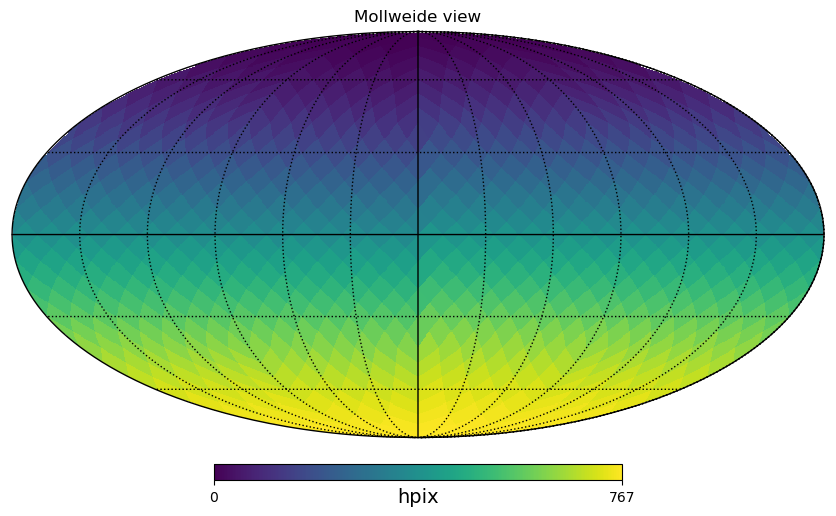

In [5]:
nside = 8
npix = hp.nside2npix(nside)
print(npix)
hp.mollview(np.arange(npix),unit="hpix",nest=False)
hp.graticule(local=True)

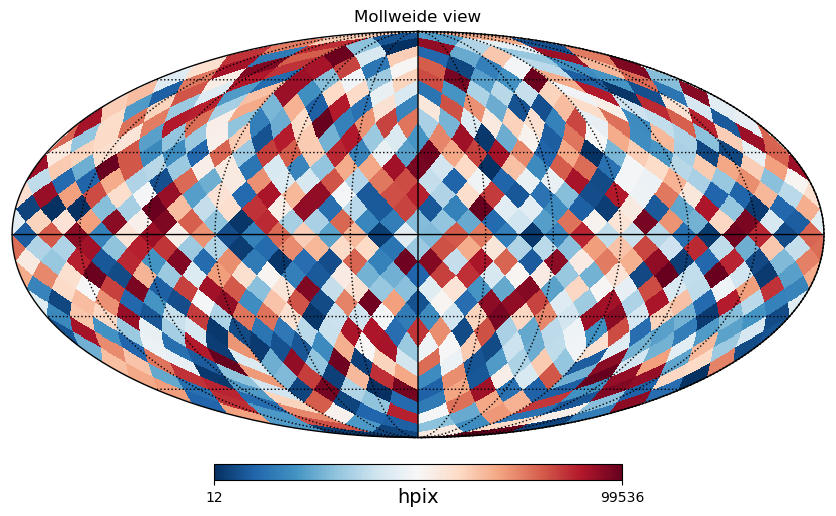

In [28]:
hp.mollview(np.random.randint(0,100000,npix,),unit="hpix",nest=False,cmap='RdBu_r')
hp.graticule(local=True)
plt.savefig('./xx.png')

## 写入hpix并分表保存

In [2]:
HOME = '/data/Catalogdata/'
db_list = ['gsc22','gsc23','gsc24','ucac','ucac2','ucac3','ucac4','ucac5']
# names_list = [names_gsc22, names_gsc23, names_gsc24, names_ucac, names_ucac2, names_ucac3, names_ucac4, names_ucac5]
path_list = [HOME+_db+'.csv' for _db in db_list]

In [ ]:
# for gsc24 and ucac{1-5}
nside = 8
npix = hp.nside2npix(nside)
print('npix: ',npix)
for _i,_db in enumerate(db_list):
    if _i == 0 or _i == 1:
        continue
    _sep = ('\t' if _db!= 'ucac5' else ',')
    _cat = pd.read_csv(path_list[_i],sep=_sep)
    print(_db, ' read')
    
    # display(_cat[-10:])
    _names_coor = (['RAmas', 'DECmas']          if _db!='ucac5' else    ['RAJ2000','DEJ2000'])
    _ra         = (_cat[_names_coor[0]]/3.6e6   if _db!='ucac5' else    _cat[_names_coor[0]])
    _dec        = (_cat[_names_coor[1]]/3.6e6   if _db!='ucac5' else    _cat[_names_coor[1]])
    _ra  = _ra.astype(np.float64).to_numpy()
    _dec = _dec.astype(np.float64).to_numpy()
    _cat[f'hpix{nside}'] = hp.ang2pix(nside, _ra, _dec, nest=True, lonlat=True)
    del _ra, _dec
    print(_db, ' convert')
    # display(_cat[-10:])
    
    _lenl = []
    for _ii in range(npix):
        # _save_path = osp.join(osp.split(path_list[_i])[0],(db_list[_i].upper()+'_hpix8/')) + _db +f'_{_ii}.csv'
        _save_path = osp.join('./',(db_list[_i].upper()+'_hpix8/')) + _db +f'_{_ii}.csv'
        if not osp.exists(osp.split(_save_path)[0]):
            print(      'mkdir %s' % osp.split(_save_path)[0])
            os.system(  'mkdir %s' % osp.split(_save_path)[0])
        _cati = _cat[_cat['hpix8']==_ii]
        print('saving file: %s || length:%d' % (_save_path, len(_cati)))
        _cati.to_csv(_save_path, index=False)
        _lenl.append(len(_cati))
        
    _lenl = np.array(_lenl)
    np.save(osp.split(_save_path)[0]+'/hpix_density.npy',_lenl)
    hp.mollview(_lenl,unit="hpix",nest=True,cmap='RdBu_r')
    hp.graticule(local=True)
    plt.savefig(osp.split(_save_path)[0]+'/hpix_density.png')
    print(_db, ' save hp')
    
    # _cat.to_csv( osp.join(osp.split(path_list[_i])[0], '%s_hp.csv'%_db) , index=False)
    _cat.to_csv( './%s_hp.csv'%_db , index=False)
    print(_db, ' save full')

gsc23由于太大，处理时内存被占满，因此需要分割后处理

In [6]:
# split gsc23
print(time.strftime('%Y.%m.%d %H:%M:%S',time.localtime()),flush=True)
HOME = '/data/Catalogdata/'
db = 'gsc23'
path = HOME + db + '.csv'

nside = 8
npix = hp.nside2npix(nside)
print('npix: ',npix)

gsc23 = pd.read_csv(path, sep='\t')
len_gsc23 = len(gsc23)
step = 200000000
startl = np.arange(0,len_gsc23,step)
for i,s in enumerate(startl):
    print(f'{s}-{s+step}')
    gsc23[s:s+step].to_csv(f'./gsc23.{i}.csv')

2023.07.18 18:49:48
npix:  768
0-200000000
200000000-400000000
400000000-600000000
600000000-800000000
800000000-1000000000


npix:  768
0  read
0  convert
gsc23  save hp
gsc23  save full
1  read
1  convert
gsc23  save hp
gsc23  save full
2  read
2  convert
gsc23  save hp
gsc23  save full
3  read
3  convert
gsc23  save hp
gsc23  save full
4  read
4  convert
gsc23  save hp
gsc23  save full


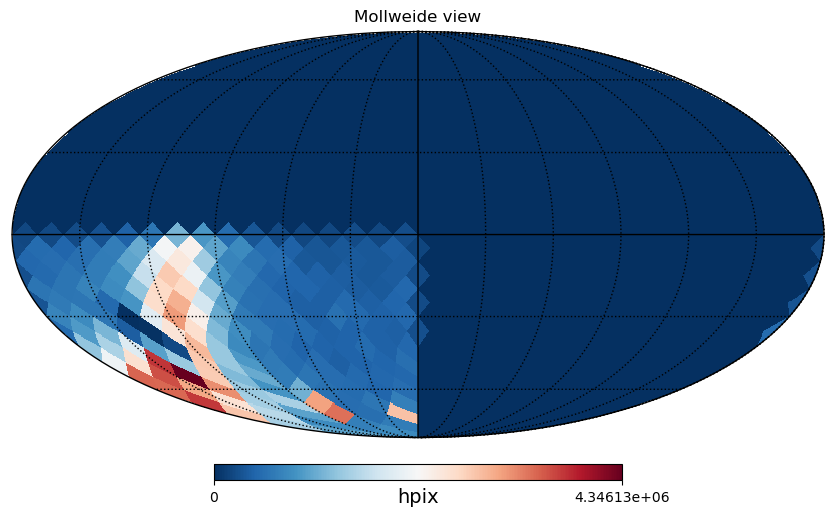

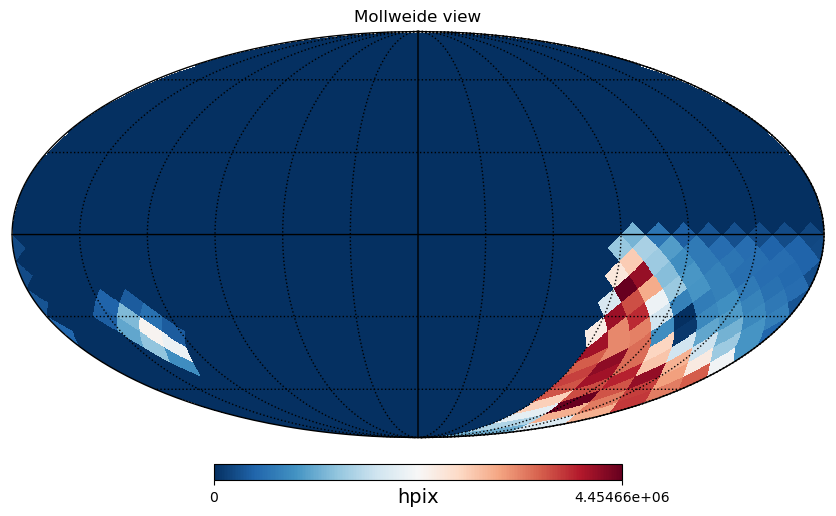

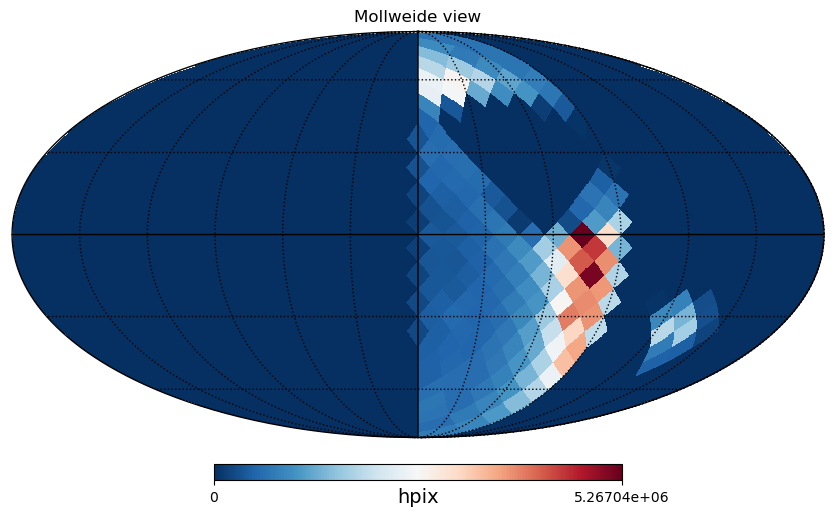

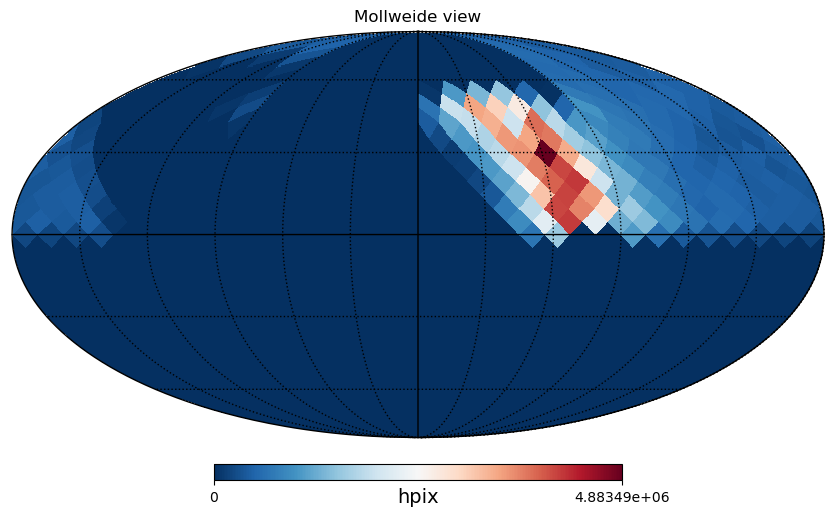

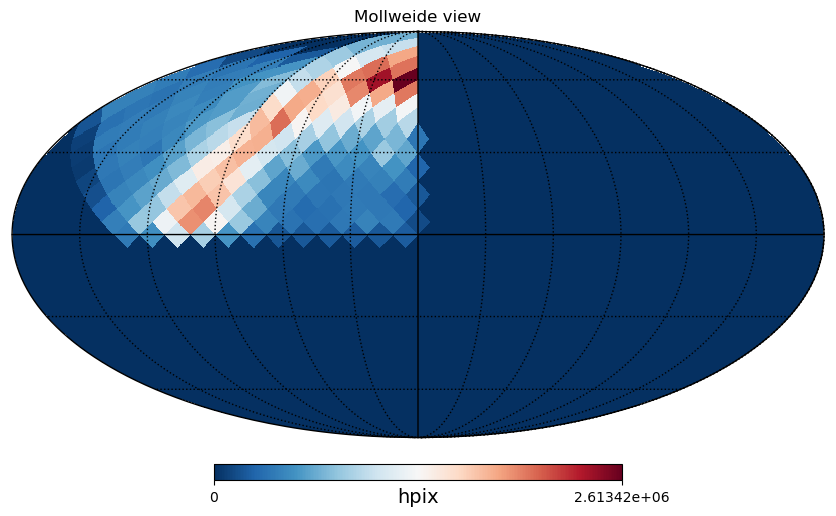

In [3]:
# for gsc23 separately
HOME = './'
db   = 'gsc23'
path = HOME + db + '.csv'
nside = 8
npix  = hp.nside2npix(nside)
print('npix: ',npix)

for _i in range(5):
    _path = path[:-4] + '.%d'%_i + path[-4:]
    _cat = pd.read_csv(_path)
    print(_i, ' read')
    
    _names_coor = (['RAmas', 'DECmas']          if db!='ucac5' else    ['RAJ2000','DEJ2000'])
    _ra         = (_cat[_names_coor[0]]/3.6e6   if db!='ucac5' else    _cat[_names_coor[0]])
    _dec        = (_cat[_names_coor[1]]/3.6e6   if db!='ucac5' else    _cat[_names_coor[1]])
    _ra  = _ra.astype(np.float64).to_numpy()
    _dec = _dec.astype(np.float64).to_numpy()
    _cat[f'hpix{nside}'] = hp.ang2pix(nside, _ra, _dec, nest=True, lonlat=True)
    del _ra, _dec
    print(_i, ' convert')
    
    _lenl = []
    for _ii in range(npix):
        # _save_path = osp.join(osp.split(path_list[_i])[0],(db_list[_i].upper()+'_hpix8/')) + _db +f'_{_ii}.csv'
        _save_path = osp.join('./',(db.upper()+'.%d_hpix8/'%_i)) + db +f'_{_ii}.csv'
        if not osp.exists(osp.split(_save_path)[0]):
            print(      'mkdir %s' % osp.split(_save_path)[0])
            os.system(  'mkdir %s' % osp.split(_save_path)[0])
        _cati = _cat[_cat['hpix8']==_ii]
        # print('saving file: %s || length:%d' % (_save_path, len(_cati)))
        _cati.to_csv(_save_path, index=False)
        _lenl.append(len(_cati))
        
    _lenl = np.array(_lenl)
    np.save(osp.split(_save_path)[0]+'/hpix_density.npy',_lenl)
    hp.mollview(_lenl,unit="hpix",nest=True,cmap='RdBu_r')
    hp.graticule(local=True)
    plt.savefig(osp.split(_save_path)[0]+'/hpix_density.png')
    print(db, ' save hp')
    
    _cat.to_csv( './%s.%d_hp.csv'%(db,_i) , index=False)
    print(db, ' save full')

In [4]:
# for gsc23 combination
HOME = './'
db   = 'gsc23'
nside = 8
npix  = hp.nside2npix(nside)
print('npix: ',npix)
for _pix in range(npix):
    _cat = pd.DataFrame([])
    # _lenl = np.zeros(npix)
    for _i in range(5):
        _path =  HOME + db.upper() + '.%d_hpix8/'%_i + db + f'_{_pix}.csv'
        _cat  =  pd.concat([_cat, pd.read_csv(_path)])
        # _lenl += np.load(osp.split(_path)[0] + '/hpix_density.npy')
        
    _save_path = HOME + 'GSC23_hpix8/' + db + f'_{_pix}.csv'
    _cat.to_csv(_save_path, index=False)
    
    # np.save(    osp.split(_save_path)[0]+'/hpix_density.npy',_lenl)
    # hp.mollview(_lenl,unit="hpix",nest=True,cmap='RdBu_r')
    # hp.graticule(local=True)
    # plt.savefig(osp.split(_save_path)[0]+'/hpix_density.png')
    # print(db, ' save hp')
    print('\r%d/%d'%(_pix,npix),end='',flush=True)
    

npix:  768
767/768

In [6]:
# for gsc23 conbination2
HOME = './'
db   = 'gsc23'
_cat = pd.DataFrame ([])
for _i in range(5):
    _path = HOME + db + f'.{_i}.csv'
    _cat = pd.concat([_cat,pd.read_csv(_path)])
_save_path = osp.split(_path)[0] + '/%s_hp.csv' %db
_cat.to_csv(_save_path, index=False)

# 示意图

由于之前的mollview没有选nest=True，因此需要重做示意图

gsc22  save hp


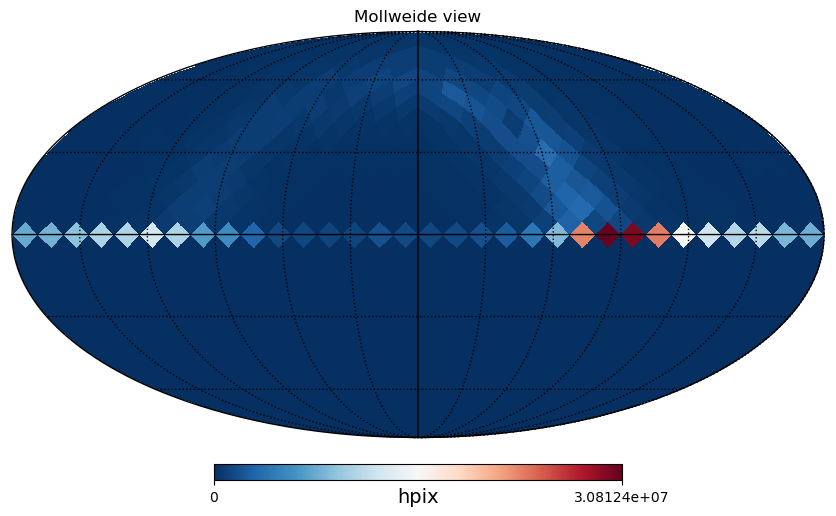

In [9]:
# for gsc22 solely
HOME = './'
db   = 'gsc22'
nside = 8
npix  = hp.nside2npix(nside)
print('npix: ',npix)
gsc22_lenl = []
for _pix in range(npix):
    _save_path = HOME+db.upper()+'_hpix8/'+db+f'_{_pix}.csv'
    gsc22_lenl.append(len(pd.read_csv(_save_path)))
gsc22_lenl = np.array(gsc22_lenl)
np.save(        osp.split(_save_path)[0]+'/hpix_density.npy',gsc22_lenl)
hp.mollview(    gsc22_lenl,unit="hpix",nest=True,cmap='RdBu_r')
hp.graticule(   local=True)
plt.savefig(    osp.split(_save_path)[0]+'/hpix_density.png')
print(db, ' save hp')

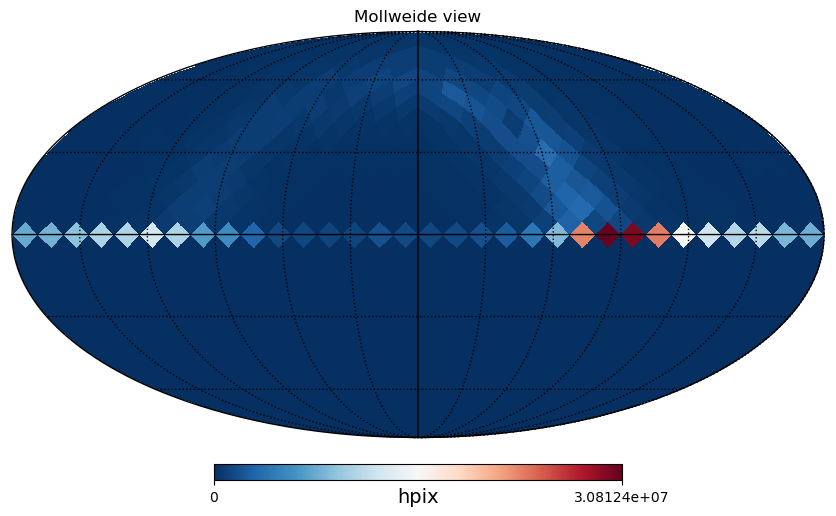

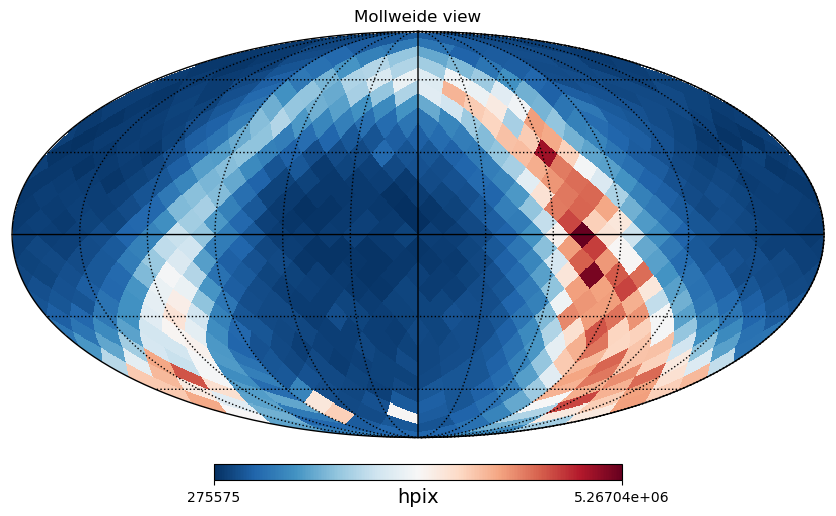

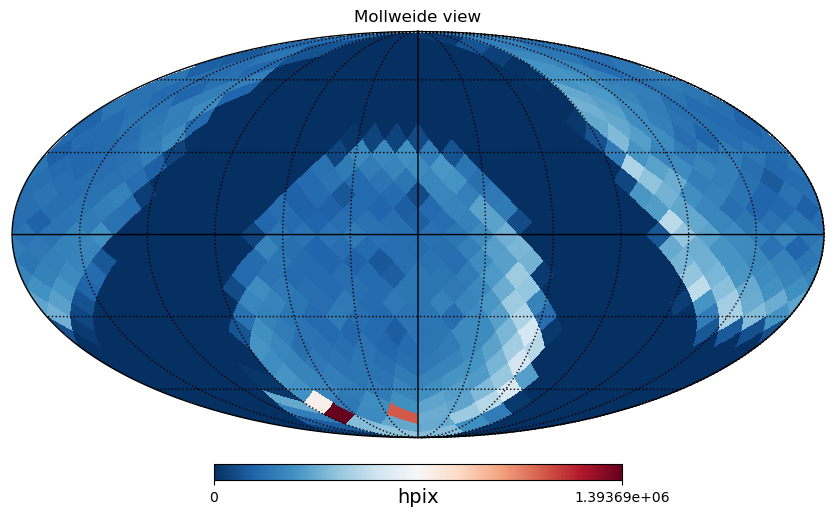

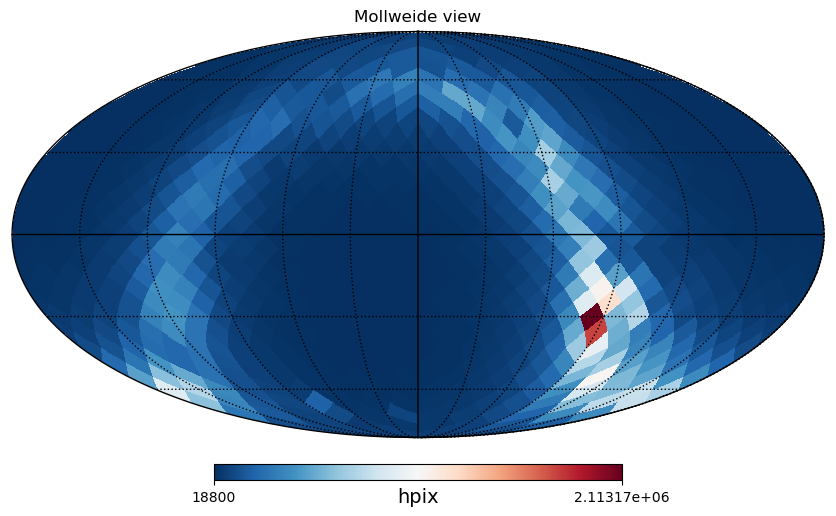

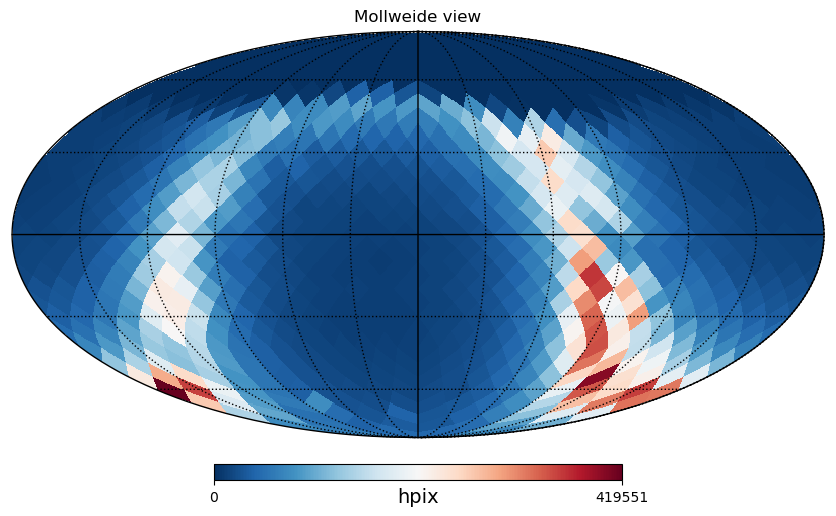

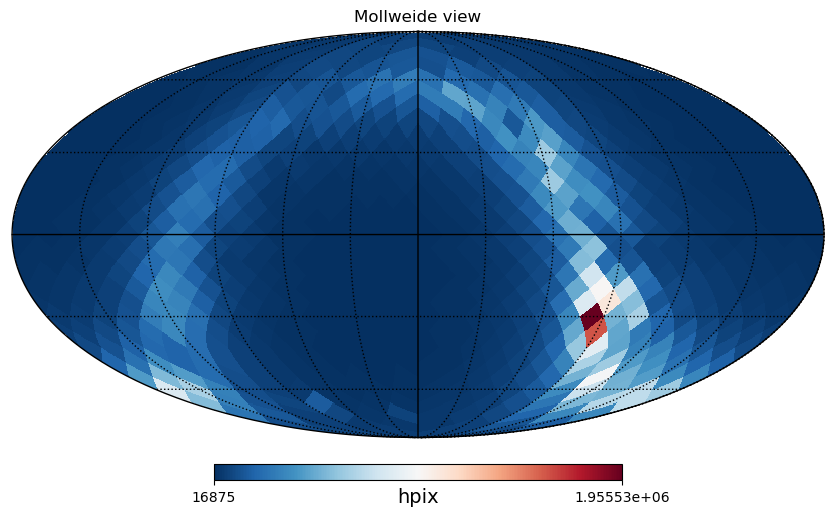

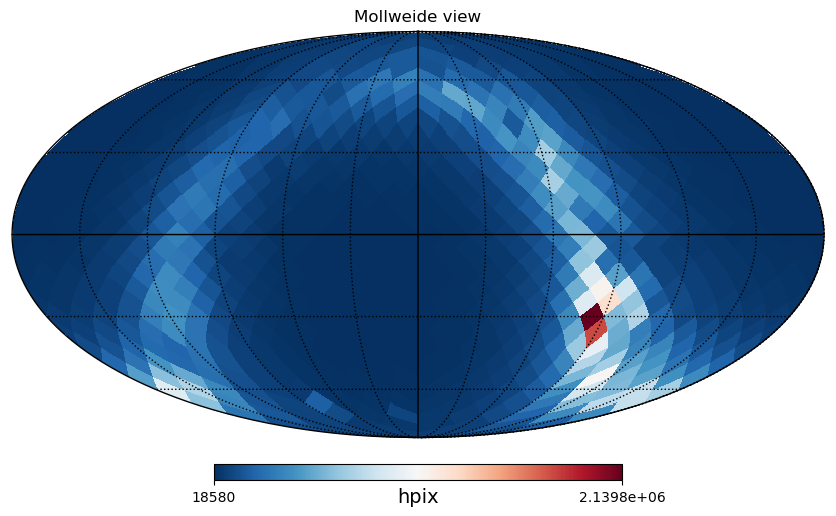

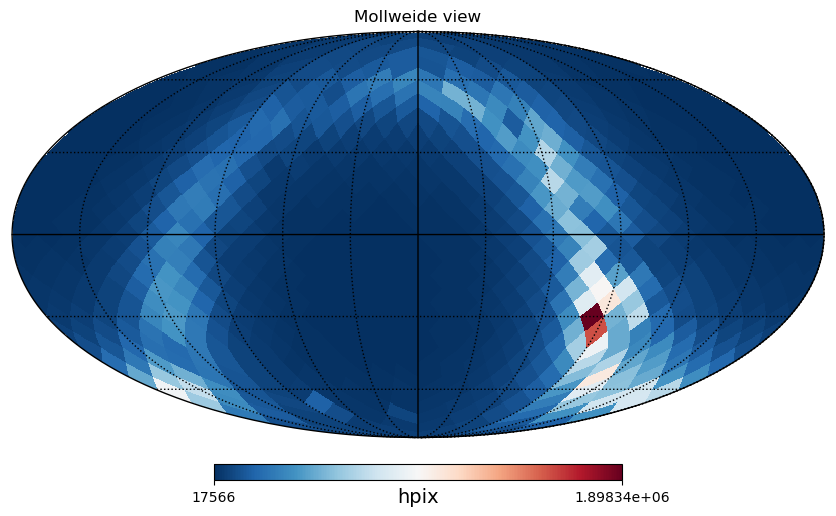

In [3]:
# for gsc24 and ucac{1-5}
HOME = './'
db_list = ['gsc22','gsc23','gsc24','ucac','ucac2','ucac3','ucac4','ucac5']

for _i,_db in enumerate(db_list):
    _save_path = HOME + _db.upper()+'_hpix8/' + '/hpix_density.npy'
    _lenl = np.load(_save_path)
    hp.mollview(    _lenl,unit="hpix",nest=True,cmap='RdBu_r')
    hp.graticule(   local=True)
    plt.savefig(    osp.split(_save_path)[0]  + '/hpix_density.png')

# 导入mysql数据库

## 生成列名文件和数据类型文件

In [45]:
HOME = './'
db_list = ['gsc22','gsc23','gsc24','ucac','ucac2','ucac3','ucac4','ucac5']

for _i, _db in enumerate(db_list):
    _sample_file = HOME + _db.upper() + '_hpix8/' + _db + '_0.csv'
    df = pd.read_csv(_sample_file)
    dt = pd.Series(df.dtypes,dtype=str)
    dt[dt=='int64'] = 'BIGINT'
    dt[dt=='int32'] = 'INT'
    dt[dt=='int16'] = 'SMALLINT'
    dt[dt=='int8'] = 'TINYINT'
    # linel[linel=='float32'] = 'FLOAT'
    dt[dt=='float32'] = 'DOUBLE'
    dt[dt=='float64'] = 'DOUBLE'
    dt[dt=='string'] = 'VARCHAR\(50\)'
    dt[dt=='bool'] = 'VARCHAR\(7\)'
    print(_db)
    display(dt)
    np.save(HOME + 'column_names_' + _db , dt.index.to_numpy())
    np.save(HOME + 'datatype_' + _db , dt.values)

gsc22


gscID2            BIGINT
RAmas             BIGINT
DECmas            BIGINT
EP00000c          BIGINT
RGSC2mm           BIGINT
BGSC2mm           BIGINT
VGSC2mm           BIGINT
IGSC2mm           BIGINT
CLASSIFICATION    BIGINT
EXTcs             BIGINT
Eccen             BIGINT
PosAng            BIGINT
htmID_8           BIGINT
htmID_6           BIGINT
healpID_nest_8    BIGINT
hpix8             BIGINT
dtype: object

gsc23


Unnamed: 0        BIGINT
ghtmID            BIGINT
gscID2            BIGINT
RAmas             BIGINT
DECmas            BIGINT
EP00000c          BIGINT
RAPMdmas          BIGINT
DECPMdmas         BIGINT
eRAPMdmas         BIGINT
eDECPMdmas        BIGINT
RGSC2mm           BIGINT
BGSC2mm           BIGINT
VGSC2mm           BIGINT
IGSC2mm           BIGINT
CLASSIFICATION    BIGINT
sourceStat        BIGINT
MASTERhpx6        BIGINT
runningnumber     BIGINT
htmID_6           BIGINT
healpID_nest_8    BIGINT
hpix8             BIGINT
dtype: object

gsc24


RAmas             BIGINT
DECmas            BIGINT
eRAmas            BIGINT
eDECmas           BIGINT
RAPMdmas          BIGINT
DECPMdmas         BIGINT
eRAPMdmas         BIGINT
eDECPMdmas        BIGINT
Mmm               BIGINT
FLAGSgsc24        BIGINT
EP00000c          BIGINT
Nobs              BIGINT
MeanEP00000c      BIGINT
MinEP00000c       BIGINT
epdiff000         BIGINT
iplate            BIGINT
nplate            BIGINT
MASTERhpx6        BIGINT
runningnumber     BIGINT
htmID_6           BIGINT
healpID_nest_8    BIGINT
hpix8             BIGINT
dtype: object

ucac


RAmas             BIGINT
DECmas            BIGINT
Amm               BIGINT
CLASSIFICATION    BIGINT
eRAmas            BIGINT
eDECmas           BIGINT
NCAT              BIGINT
EpRA00000c        BIGINT
EpDEC00000c       BIGINT
RAPMdmas          BIGINT
DECPMdmas         BIGINT
eRAPMdmas         BIGINT
eDECPMdmas        BIGINT
ID                BIGINT
EP00000c          BIGINT
DISTGSCcas        BIGINT
MASTERhpx6        BIGINT
runningnumber     BIGINT
htmID_6           BIGINT
healpID_nest_8    BIGINT
hpix8             BIGINT
dtype: object

ucac2


htmID_6      BIGINT
RAmas        BIGINT
DECmas       BIGINT
eRAmas       BIGINT
eDECmas      BIGINT
RAPMdm       BIGINT
DECPMdm      BIGINT
eRAPMdm      BIGINT
eDECPMdm     BIGINT
Amm          BIGINT
EP00000c     BIGINT
EP00000cd    BIGINT
stat1        BIGINT
stat2        BIGINT
ID           BIGINT
hpix8        BIGINT
dtype: object

ucac3


RAmas             BIGINT
DECmas            BIGINT
eRAmas            BIGINT
eDECmas           BIGINT
RAPMdmas          BIGINT
DECPMdmas         BIGINT
eRAPMdmas         BIGINT
eDECPMdmas        BIGINT
Amm               BIGINT
EP00000c          BIGINT
EpRA00000c        BIGINT
EpDEC00000c       BIGINT
stat1             BIGINT
stat2             BIGINT
ID                BIGINT
DISTGSCcas        BIGINT
MASTERhpx6        BIGINT
runningnumber     BIGINT
htmID_6           BIGINT
healpID_nest_8    BIGINT
hpix8             BIGINT
dtype: object

ucac4


RAmas             BIGINT
DECmas            BIGINT
Amm               BIGINT
CLASSIFICATION    BIGINT
eRAmas            BIGINT
eDECmas           BIGINT
NCAT              BIGINT
EpRA00000c        BIGINT
EpDEC00000c       BIGINT
RAPMdmas          BIGINT
DECPMdmas         BIGINT
eRAPMdmas         BIGINT
eDECPMdmas        BIGINT
ID                BIGINT
EP00000c          BIGINT
DISTGSCcas        BIGINT
MASTERhpx6        BIGINT
runningnumber     BIGINT
htmID_6           BIGINT
healpID_nest_8    BIGINT
hpix8             BIGINT
dtype: object

ucac5


RAJ2000      DOUBLE
DEJ2000      DOUBLE
SrcIDgaia    BIGINT
RAgaia       DOUBLE
e_RAgaia     DOUBLE
DEgaia       DOUBLE
e_DEgaia     DOUBLE
Org          BIGINT
Nu           BIGINT
EPucac       DOUBLE
pmRA         DOUBLE
e_pmRA       DOUBLE
pmDE         DOUBLE
e_pmDE       DOUBLE
Gmag         DOUBLE
f.mag        DOUBLE
Rmag         DOUBLE
Jmag         DOUBLE
Hmag         DOUBLE
Kmag         DOUBLE
hpix8        BIGINT
dtype: object

In [8]:
# 由于倒腾gsc23星表的时候，某次未设置index=False，导致gsc23分表和hp表的第一行变成了Unnamed: 0，有可能是总表的index
# 在这里给gsc23的第一行改成"allID"并设置为BIGINT

import numpy as np
# gsc23 check
class GSC23_check(object):
    def __init__(self,db):
        self.db = db
        self.HOME = './'
        self.datatypes   = np.load(self.HOME+'/datatype_%s.npy'%db,     allow_pickle=True)
        self.names       = np.load(self.HOME+'/column_names_%s.npy'%db, allow_pickle=True)
        self.column_defs = [f"{col}   {self.datatypes[i]} NULL"       if col != 'dec' else
                            f"`{col}` {self.datatypes[i]} NULL" 
                            for i, col in enumerate(self.names)]
        return

xx = GSC23_check('gsc23')
xx.column_defs
xx.column_defs[0] = 'allID  BIGINT NULL'
np.save('./column_names_gsc23.npy',xx.column_defs)
print(xx.column_defs)


['allID  BIGINT NULL',
 'ghtmID   BIGINT NULL',
 'gscID2   BIGINT NULL',
 'RAmas   BIGINT NULL',
 'DECmas   BIGINT NULL',
 'EP00000c   BIGINT NULL',
 'RAPMdmas   BIGINT NULL',
 'DECPMdmas   BIGINT NULL',
 'eRAPMdmas   BIGINT NULL',
 'eDECPMdmas   BIGINT NULL',
 'RGSC2mm   BIGINT NULL',
 'BGSC2mm   BIGINT NULL',
 'VGSC2mm   BIGINT NULL',
 'IGSC2mm   BIGINT NULL',
 'CLASSIFICATION   BIGINT NULL',
 'sourceStat   BIGINT NULL',
 'MASTERhpx6   BIGINT NULL',
 'runningnumber   BIGINT NULL',
 'htmID_6   BIGINT NULL',
 'healpID_nest_8   BIGINT NULL',
 'hpix8   BIGINT NULL']

In [14]:
xx = np.load('./column_names_gsc23.npy',allow_pickle=True)
xx[0] = 'allID'
xx

array(['allID', 'ghtmID', 'gscID2', 'RAmas', 'DECmas', 'EP00000c',
       'RAPMdmas', 'DECPMdmas', 'eRAPMdmas', 'eDECPMdmas', 'RGSC2mm',
       'BGSC2mm', 'VGSC2mm', 'IGSC2mm', 'CLASSIFICATION', 'sourceStat',
       'MASTERhpx6', 'runningnumber', 'htmID_6', 'healpID_nest_8',
       'hpix8'], dtype=object)

In [16]:
np.save('./column_names_gsc23.npy', xx)

## 连接返回测试

In [1]:
import mysql.connector

mydb = mysql.connector.connect(
        host="localhost",
        user="root",
        password="xxxx",
        database='xxxx'
        )
mycursor = mydb.cursor()

xx= mycursor.execute('SELECT COUNT(*) FROM gsc22_0;')
xx

In [3]:
xx == None

True

In [10]:
mycursor.execute('SELECT COUNT(*) FROM gsc22_0;')
xx = mycursor.fetchall()
xx

[(84469,)]

In [14]:
84469 in xx[0]

True

In [27]:
file = './GSC22_hpix8/gsc22_486.csv'
table_name = osp.split(file)[1][:-4]
mycursor.execute("SHOW TABLES;")
exists_list = mycursor.fetchall()
if table_name in np.array(exists_list).reshape(-1):
    mycursor.execute(f"SELECT COUNT(*) FROM {table_name}")
    exists_len = mycursor.fetchall()[0][0]
    with open(file,'r') as f:
        table_len = len(f.readlines())-1
    if exists_len != table_len:
        print(f'DROP::{table_name}')
    else:
        print('check pass')
else:
    print('not exist')

DROP::gsc22_486


In [24]:
mycursor.execute("SHOW TABLES;")
exists_list = mycursor.fetchall()
np.array(exists_list).reshape(-1)

array(['gsc22_0', 'gsc22_1', 'gsc22_10', 'gsc22_100', 'gsc22_101',
       'gsc22_102', 'gsc22_103', 'gsc22_104', 'gsc22_105', 'gsc22_106',
       'gsc22_107', 'gsc22_108', 'gsc22_109', 'gsc22_11', 'gsc22_110',
       'gsc22_111', 'gsc22_112', 'gsc22_113', 'gsc22_114', 'gsc22_115',
       'gsc22_116', 'gsc22_117', 'gsc22_118', 'gsc22_119', 'gsc22_12',
       'gsc22_120', 'gsc22_121', 'gsc22_122', 'gsc22_123', 'gsc22_124',
       'gsc22_125', 'gsc22_126', 'gsc22_127', 'gsc22_128', 'gsc22_129',
       'gsc22_13', 'gsc22_130', 'gsc22_131', 'gsc22_132', 'gsc22_133',
       'gsc22_134', 'gsc22_135', 'gsc22_136', 'gsc22_137', 'gsc22_138',
       'gsc22_139', 'gsc22_14', 'gsc22_140', 'gsc22_141', 'gsc22_142',
       'gsc22_143', 'gsc22_144', 'gsc22_145', 'gsc22_146', 'gsc22_147',
       'gsc22_148', 'gsc22_149', 'gsc22_15', 'gsc22_150', 'gsc22_151',
       'gsc22_152', 'gsc22_153', 'gsc22_154', 'gsc22_155', 'gsc22_156',
       'gsc22_157', 'gsc22_158', 'gsc22_159', 'gsc22_16', 'gsc22_160',
   

# 实验

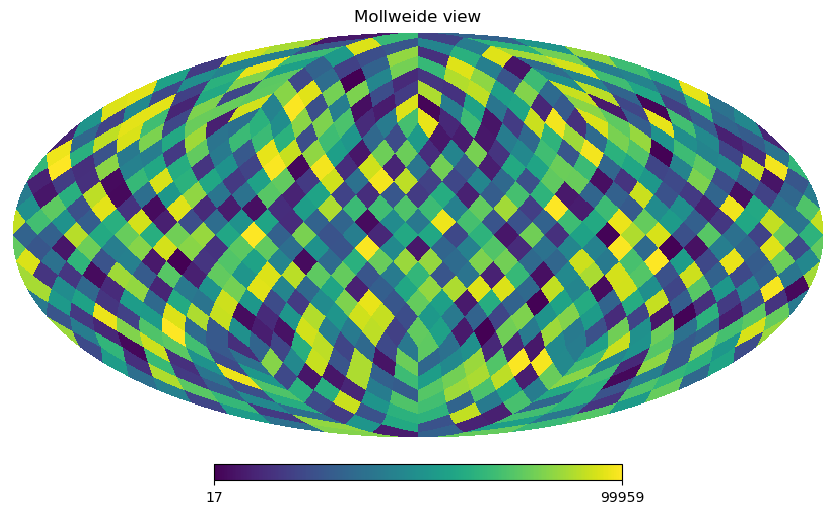

In [5]:
npix = hp.nside2npix(8)
xxl = []
for i in range(npix):
    xxl.append(np.random.randint(100000))
hp.mollview(np.array(xxl))

In [ ]:
tt = pd.read_csv('./ucac5t.csv')
